### 확률과 통계

In [3]:
!pip install matplotlib

In [6]:
import pandas as pd  #엑셀파일을 파이썬에서 다룰 수 있게 해주는 모듈
import statsmodels.api as sm #회기분석이 가능하도록 할 수 있는 모듈
import matplotlib.pyplot as plt #파이썬에서 시각화가 가능하도록 해줌
import numpy as np #선형대수학 가능하게
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random #난수생성

#### 산점도

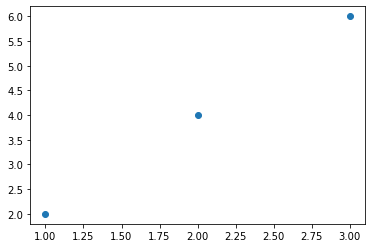

In [7]:
x=[1,2,3]
y=[2,4,6]
plt.scatter(x,y) #scatter : 산점도

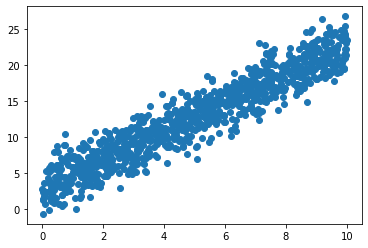

In [10]:
#기울기가 2, y절편이 3인 회귀 곡선 그려보기
#x의 범위 : 0~10
#random.gauss(평균,표준편차)
x1=[]
y1=[]
for i in range(1000):
    imsi = random.random()*10
    x1.append(imsi)
    y1.append(2*imsi+3+random.gauss(0,2)) #random.dauss(평균0,표준편차 1인 정규분포에서 임의의 난수 추출해라) : 회귀분석의 정규성을 따라야해서 정규분포 사용
plt.scatter(x1,y1)                        #분산을 바꾸면 분포도 넓이 바뀜 , y1.append(2*imsi+random.gauss(3,2))랑 같은 분포도를 나타냄

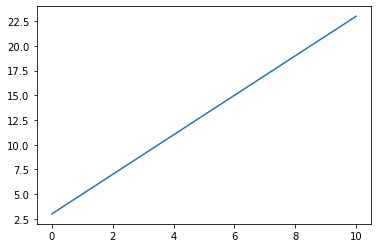

In [11]:
x2=range(11)
y2=[2*n+3 for n in range(11)]
plt.plot(x2,y2)     #직선으로 그릴 땐 plot 

<function matplotlib.pyplot.show(close=None, block=None)>

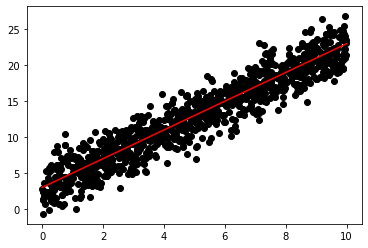

In [13]:
plt.scatter(x1,y1,c="black")  #기본은 파란색
plt.plot(x2,y2,c="red")
plt.show

In [14]:
X=sm.add_constant(x1)    #산점도에서 add.constant를 안하면 y절편이 설정이 안되므로 설정해주라는 뜻
model = sm.OLS(y1,X)     #가장 기본적인 회귀모형 : OLS(종속변수,독립변수)
result = model.fit()     #주어진 조건으로 회귀모형을 돌린다

print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     8223.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:01:52   Log-Likelihood:                -2097.1
No. Observations:                1000   AIC:                             4198.
Df Residuals:                     998   BIC:                             4208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9129      0.126     23.193      0.0

const(y절편) , coef(회귀계수:베타값) , std err(표준오차), t값, P>|t|  젤 마지막 : 신뢰구간
t값은 1.96보다 크면 유효하다
method : 최소제곱법으로 계산했음.

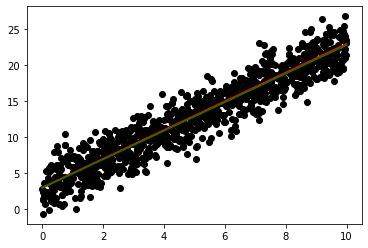

In [15]:
x3=range(11)
y3=[1.9897*n+2.9129 for n in x3]

plt.scatter(x1, y1, c = "black")
plt.plot(x2, y2, c = "red")
plt.plot(x3, y3, c = "green")
plt.show()

In [16]:
score1 = 0
score2 = 0
for a, i in enumerate(x1):    #enumerate : 리스트의 원소에 인덱스(순서값)을 부여해줌 
    score1 += (y1[a]-(2*i+3))**2
    score2 += (y1[a]-(1.9897*i+2.9129))**2
print(score1/len(x1))
print(score2/len(x1))

3.90168757857092
3.88171341066943


#### 다중공선성

In [24]:
x4 = []
x4_1 = []
y4 = []
for i in range(1000):
    imsi = random.random()*10
    x4.append(imsi)
    x4_1.append(imsi+random.gauss(0,1))
    y4.append(2*imsi+random.gauss(3,2))
    
df = {"x4":x4,"x4_1":x4_1, "y4":y4}
df = pd.DataFrame(df)

x4 = df[["x4","x4_1"]]
y4=df["y4"]

x4 = sm.add_constant(x4, has_constant="add")
model = sm.OLS(y4,x4)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     4375.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:32:45   Log-Likelihood:                -2093.8
No. Observations:                1000   AIC:                             4194.
Df Residuals:                     997   BIC:                             4208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8533      0.127     22.472      0.0

x4를 지우면 x4_1의 값이 유효한 값으로 나오게 되는데, 이건 다중공선성이슈가 발생해서 회귀식에서 유효해짐

In [19]:
#x4 = []
#x4_1 = []
#y4 = []
#for i in range(1000):
    #imsi = random.random()*10
    #x4.append(imsi)
    #x4_1.append(imsi+random.gauss(0,1))
   #y4.append(2*imsi+random.gauss(3,2))
    
#df = {"x4":x4,"x4_1":x4_1, "y4":y4}
#df = pd.DataFrame(df)

#x4 = df["x4_1"]
#y4=df["y4"]

#x4 = sm.add_constant(x4, has_constant="add")
#model = sm.OLS(y4,x4)
#result = model.fit()

#print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4222.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:29:02   Log-Likelihood:                -2423.4
No. Observations:                1000   AIC:                             4851.
Df Residuals:                     998   BIC:                             4861.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0378      0.161     25.082      0.0

In [21]:
df.corrwith(df["x4"]) #다중공성선 확인하려고 상관관계 행렬 확인해야함

x4      1.000000
x4_1    0.948373
y4      0.949883
dtype: float64

In [22]:
df.corr()

,x4,x4_1,y4
x4,1.000000,0.948373,0.949883
x4_1,0.948373,1.000000,0.899331
y4,0.949883,0.899331,1.000000


In [25]:
df.corrwith(df["x4"])

x4      1.000000
x4_1    0.946002
y4      0.947377
dtype: float64

In [26]:
#VIF - 10이상 나오면 독립변수 삭제

for i in range(len(model.exog_names)):
    print(model.exog_names[i],variance_inflation_factor(model.exog,i))

const 4.167704162074369
x4 9.516488681239352
x4_1 9.516488681239352
